In [2]:
import numpy as np

from gscore.fdr import GlobalDistribution

In [14]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/protein.test"

In [15]:
global_model = GlobalDistribution.load(model_path)

In [16]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

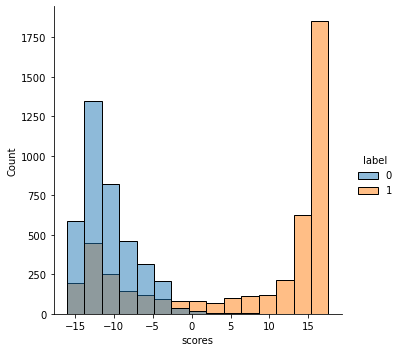

In [17]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [18]:
decoy_values = check[check["scores"] >= 0.50]["label"].value_counts()

In [19]:
decoy_values[0] / decoy_values[1]

0.010174880763116057

In [20]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [21]:
function_check

,label,scores,type
0,-16.051788,0.001666,Target
1,-16.018108,0.001822,Target
2,-15.984428,0.001977,Target
3,-15.950749,0.002138,Target
4,-15.917069,0.002327,Target
...,...,...,...
995,17.459747,0.016006,Target
996,17.493427,0.014003,Target
997,17.527107,0.012255,Target
998,17.560787,0.010672,Target


In [22]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

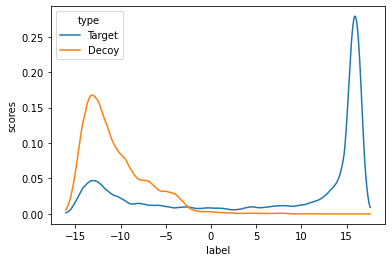

In [23]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [24]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.        , 0.        , 0.        , ..., 0.00405445, 0.00337229,
       0.00127327])